## NOTEBOOK: Exploratory Data Analysis

Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import pickle
import warnings
warnings.simplefilter('ignore')

Import dataset

In [2]:
with open('../data/pickled/cleanedData.pkl', 'rb') as fin:
    df = pickle.load(fin)

In [3]:
df.head()

,genHealth,timeEat,timeSnack,fastfdFreq,exerciseFreq,obese
0,1,30,2,0,0,1
1,2,45,14,1,0,0
2,5,60,0,0,0,1
3,2,0,0,0,0,0
4,4,65,0,0,5,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11021 entries, 0 to 11211
Data columns (total 6 columns):
genHealth       11021 non-null int64
timeEat         11021 non-null int64
timeSnack       11021 non-null int64
fastfdFreq      11021 non-null int64
exerciseFreq    11021 non-null int64
obese           11021 non-null int64
dtypes: int64(6)
memory usage: 602.7 KB


### Explore relationships

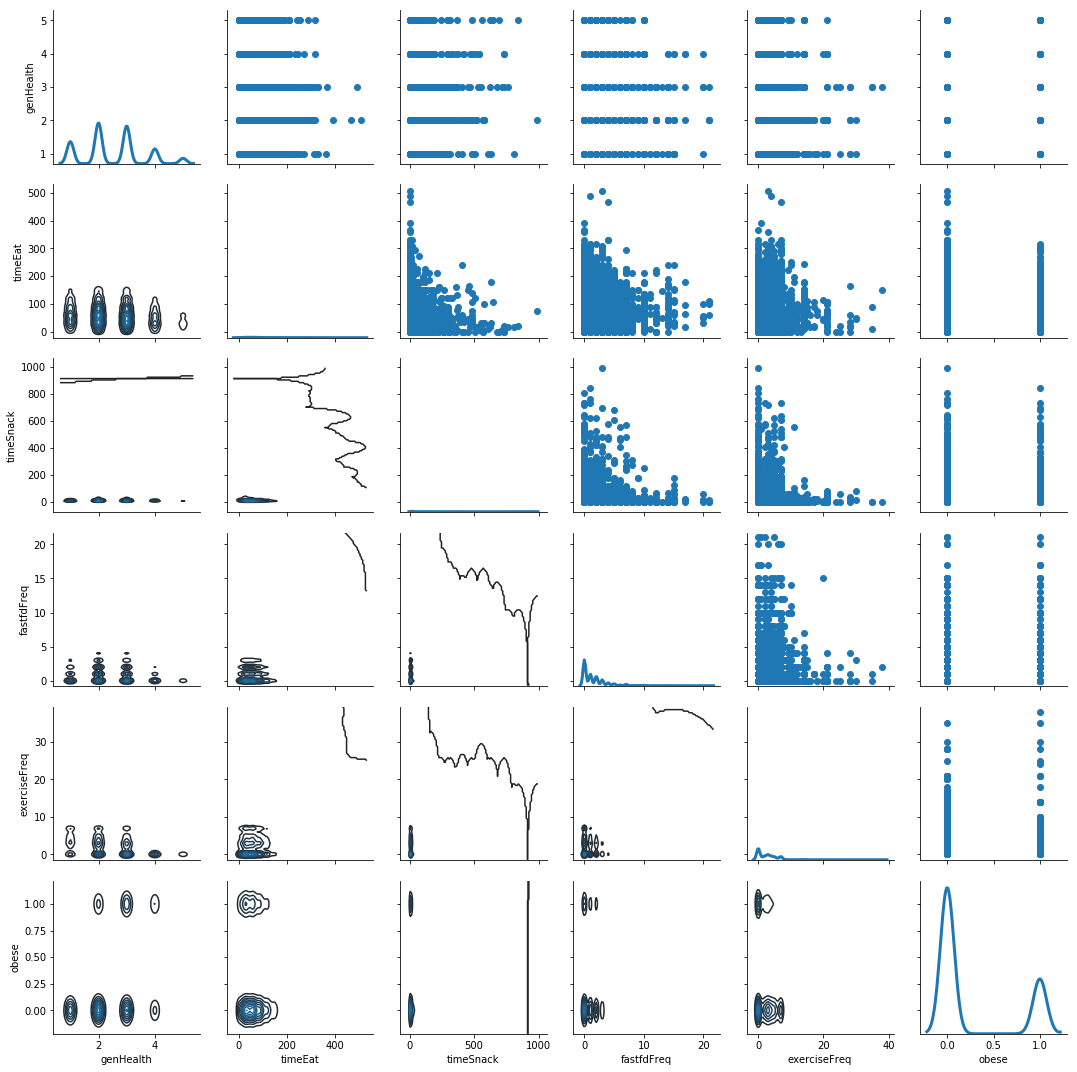

In [5]:
g = sns.PairGrid(df)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=3, legend=False);

### Explore correlations

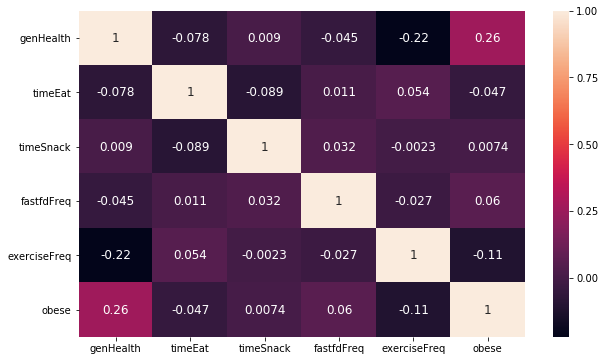

In [6]:
fig,ax = plt.subplots(1,1,figsize=(10,6))
sns.heatmap(df.corr(), annot=True, annot_kws={'size':12}, ax=ax)

- There's really no good correlations among the variables with the target
- 'genHealth' has the most correlation (0.26) with the target

### Inspect Variables with boxplot

In [7]:
# Subsets
df_obese= df[df.obese==1]
df_nonObese= df[df.obese==0]
df_obese.shape, df_nonObese.shape

((3008, 6), (8013, 6))

In [8]:
df.columns

Index(['genHealth', 'timeEat', 'timeSnack', 'fastfdFreq', 'exerciseFreq',
       'obese'],
      dtype='object')

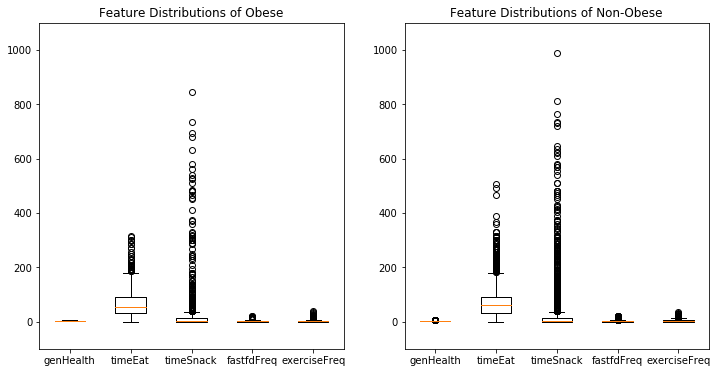

In [9]:
plt.subplots(1,2,figsize=(12,6))

plt.subplot(1,2,1)
plt.boxplot([df_obese.iloc[:,i] for i in range(5)])
plt.ylim([-100,1100])
plt.xticks(np.arange(1,6), df.columns[:-1])
plt.title('Feature Distributions of Obese')

plt.subplot(1,2,2)
plt.boxplot([df_nonObese.iloc[:,i] for i in range(5)])
plt.ylim([-100,1100])
plt.xticks(np.arange(1,6), df.columns[:-1])
plt.title('Feature Distributions of Non-Obese');

### Inspect 'genHealth'

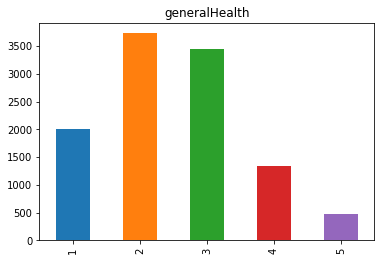

In [10]:
df['genHealth'].value_counts().sort_index().plot(kind='bar')
plt.title('generalHealth');

### Inspect 'exerciseFreq' and 'FastFdFreq'

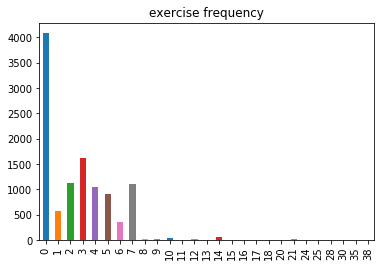

In [11]:
df['exerciseFreq'].value_counts().sort_index().plot(kind='bar')
plt.title('exercise frequency');

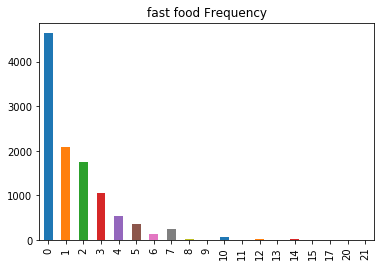

In [12]:
df['fastfdFreq'].value_counts().sort_index().plot(kind='bar')
plt.title('fast food Frequency');

### Inspect TimeEat and TimeSnack

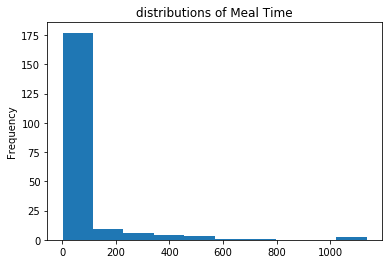

In [13]:
df['timeEat'].value_counts().sort_index().plot(kind='hist')
plt.title('distributions of Meal Time');

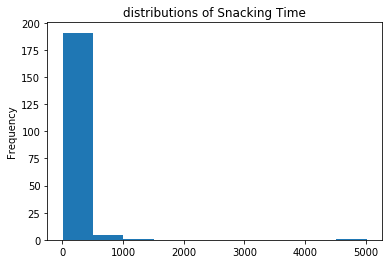

In [14]:
df['timeSnack'].value_counts().sort_index().plot(kind='hist')
plt.title('distributions of Snacking Time');

- Most of these features are zero-heavy, which might require transformations if we use a linear model

### Checkout relationships between features and target

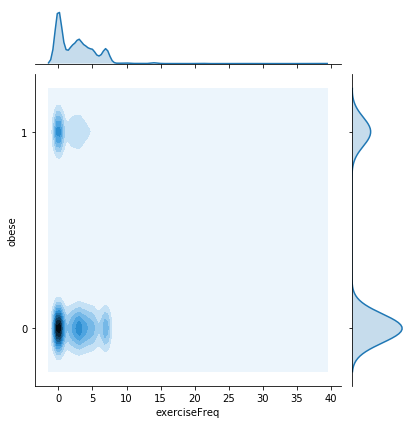

In [19]:
# Examine exercise frequency
ax = sns.jointplot('exerciseFreq','obese',data=df, kind='kde')
ax.ax_joint.set_yticks([0,  1]);

- Interestingly, the highest density is observed where people are 'Not Obese' and have 0 exerciseFreq.  However, there are some 'sensible' densities among those who are 'Not Obese', i.e., people who exercise between 1-5 times a week and between 5 and 10 times a week
- The highest maximum for 'Obese' people is observed around 0 exerciseFreq (not surprisingly) , with some dispersions at greater values.  

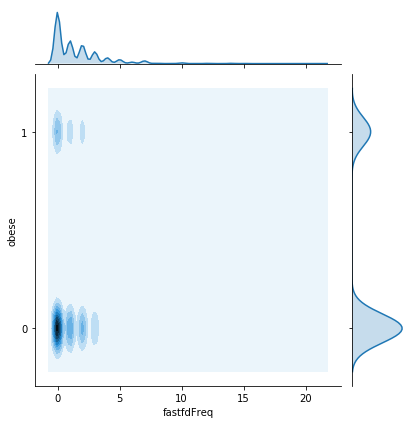

In [20]:
# Examine fastfood frequency
ax = sns.jointplot('fastfdFreq','obese',data=df, kind='kde')
ax.ax_joint.set_yticks([0,  1]);

- As expected, the highest density is observed at 0, where 'Not Obese' people spend 0 times buying fastfood (takeouts and delivery)
- However, it's very surprising that 'Obese' people don't seem to have a different feature in their fastfdFreq distribution

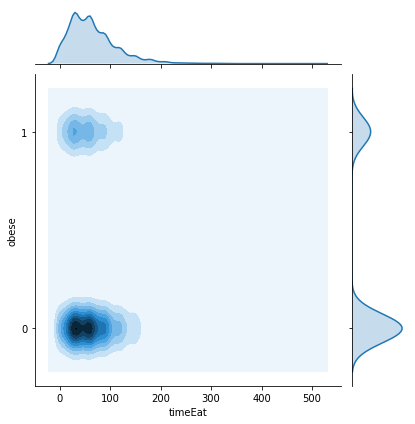

In [21]:
# Examine time spent eating primary meals
ax = sns.jointplot('timeEat','obese',data=df, kind='kde')
ax.ax_joint.set_yticks([0,  1]);

-  Similar contours in both 'Obese' and 'Not Obese' 

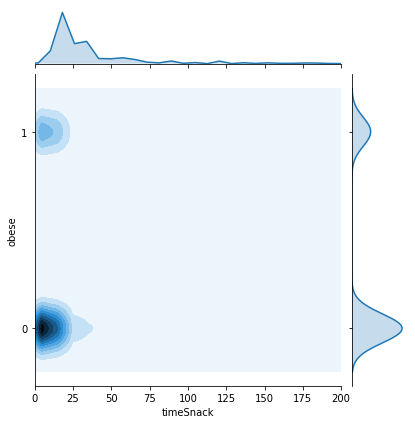

In [24]:
# Examine time spent eating secondary meals/snacking
ax = sns.jointplot('timeSnack','obese',data=df, kind='kde', xlim=(0,200))
ax.ax_joint.set_yticks([0,  1]);

- Looks about the same for both categories

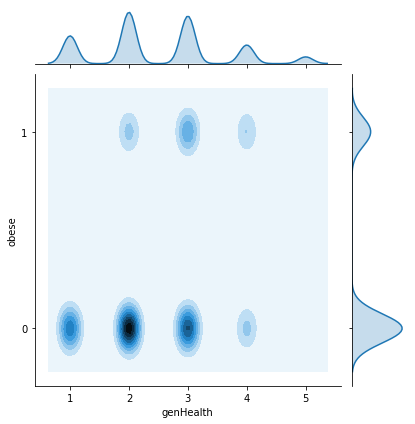

In [29]:
# Examine general health 
ax = sns.jointplot('genHealth','obese', data=df, kind='kde')
ax.ax_joint.set_yticks([0,  1]);

-  people who are 'Not Obese' seem to slightly feel better than those who are 'Obese'

---